In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [185]:
# genes = pd.read_csv('../data/genes.bed', sep='\t', comment='t', header=None)

In [215]:
exp = "ENCFF034WYM"
df = pd.read_csv('../data/H3K36me3.' + exp + '.bed.gz.mm10.bed', sep='\t', comment='t', header=None)
df["len"] = df[2] - df[1]
df

,0,1,2,3,4,len
0,chr1,10022841,10025240,Peak_10672,270,2399
1,chr1,10025912,10027656,Peak_7082,319,1744
2,chr1,10027785,10028029,Peak_22502,181,244
3,chr1,10028181,10029776,Peak_6117,343,1595
4,chr1,10029944,10030682,Peak_25150,170,738
...,...,...,...,...,...,...
103179,chrY,90732178,90732397,Peak_56940,96,219
103180,chrY,90738649,90740632,Peak_144,949,1983
103181,chrY,90740901,90743174,Peak_127,974,2273
103182,chrY,90744302,90745087,Peak_10896,265,785


In [224]:
def hhist(df1, mode, expp):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.hist(df1.len, bins = 100)
    plt.xlabel("длина пика")
    plt.ylabel("кол-во")
    plt.title(expp + ' ' + mode + '\nкол-во пиков: ' + str(df1.shape[0]))
    if len(mode):
        mode = "_" + mode
    plt.savefig('../img/' + expp + mode + '.png')

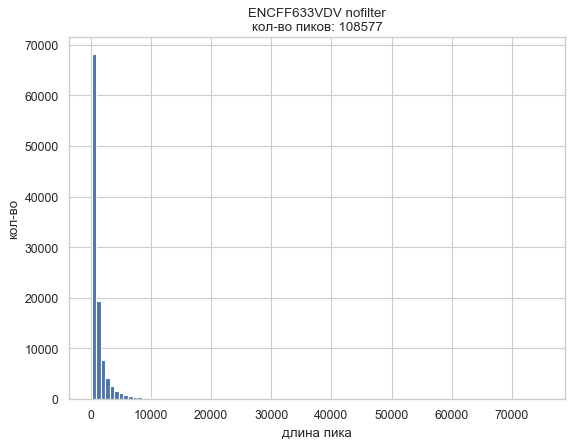

In [225]:
hhist(df, "nofilter", exp)

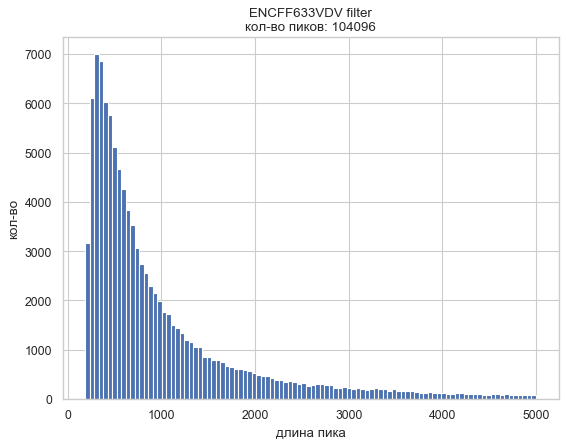

In [226]:
df = df[df["len"] < 5000]
hhist(df, "filter", exp)

In [227]:
df_ENCFF034WYM = df.copy()

In [228]:
exp = "ENCFF633VDV"
df = pd.read_csv('../data/H3K36me3.' + exp + '.bed.gz.mm10.bed', sep='\t', comment='t', header=None)
df["len"] = df[2] - df[1]
df

,0,1,2,3,4,len
0,chr1,10022342,10022859,Peak_122423,46,517
1,chr1,10022928,10025221,Peak_8561,368,2293
2,chr1,10025344,10025845,Peak_38947,142,501
3,chr1,10025934,10027692,Peak_9197,356,1758
4,chr1,10027747,10029823,Peak_6054,428,2076
...,...,...,...,...,...,...
108572,chrY,90738636,90740639,Peak_1009,768,2003
108573,chrY,90740895,90743207,Peak_685,844,2312
108574,chrY,90744292,90745064,Peak_14587,282,772
108575,chrY,90745168,90745930,Peak_3689,521,762


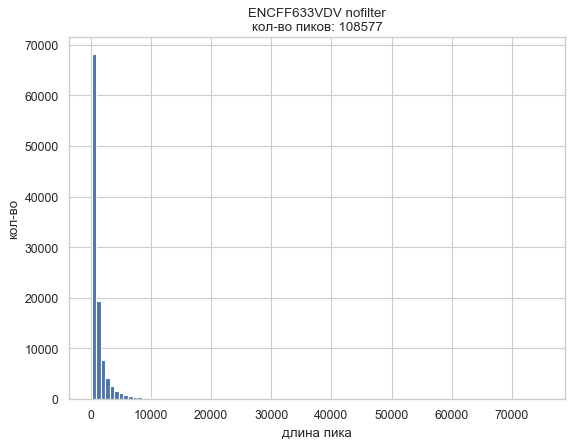

In [229]:
hhist(df, "nofilter", exp)

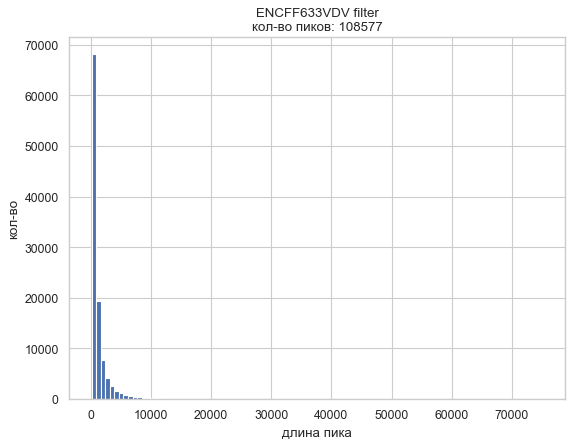

In [230]:
hhist(df, "filter", exp)

In [231]:
df_ENCFF633VDV = df.copy()

In [232]:
df_ENCFF034WYM[[0,1,2,3,4]].to_csv('../data/H3K36me3.ENCFF034WYM.filtered.bed', sep ='\t', header=None, index=None)
df_ENCFF633VDV[[0,1,2,3,4]].to_csv('../data/H3K36me3.ENCFF633VDV.filtered.bed', sep ='\t', header=None, index=None)
all_exp.to_csv('../data/H3K36me3.filtered.bed', sep ='\t', header=None, index=None) # склеил тут а не позже

In [233]:
""" В итоге использовал гены со всего генома, но код решил оставить
group = all_exp.groupby(0)
min_start = group.min()[1].to_frame()
max_end = group.max()[2].to_frame()

min_start["chr"] = min_start.index
max_end["chr"] = max_end.index
region = min_start.merge(max_end, how='inner', on = "chr")
for index, row in region.iterrows():
    start = row[1]
    end = row[2]
    print(row["chr"], row[1], row[2])
"""

' В итоге использовал гены со всего генома, но код решил оставить\ngroup = all_exp.groupby(0)\nmin_start = group.min()[1].to_frame()\nmax_end = group.max()[2].to_frame()\n\nmin_start["chr"] = min_start.index\nmax_end["chr"] = max_end.index\nregion = min_start.merge(max_end, how=\'inner\', on = "chr")\nfor index, row in region.iterrows():\n    start = row[1]\n    end = row[2]\n    print(row["chr"], row[1], row[2])\n'

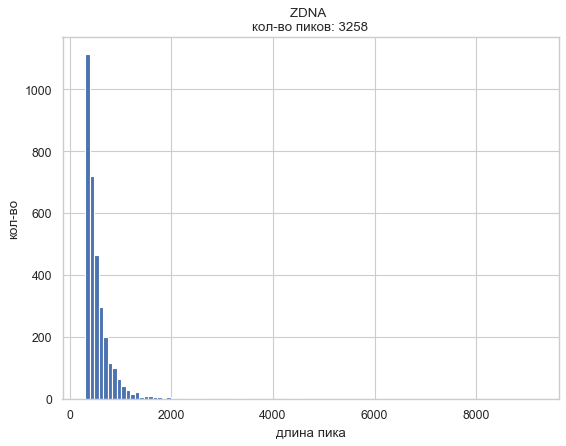

In [235]:
df = pd.read_csv('../data/mouseZ-DNA1.bed', sep='\t', comment='t', header=None)
df["len"] = df[2] - df[1]
hhist(df, "", "ZDNA")

In [181]:
df = pd.read_csv('../data/genes_intersect.bed', sep='\t', comment='t', header=None)

In [182]:
np.savetxt('../data/genes.names', np.array(df[3].value_counts().index.values), delimiter='\n', fmt='%s')